In [1]:
import numpy as np
from random import *
import random
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# The maximum-subarray problem

## A solution using divide-and-conquer

In [13]:
def Find_Max_Crossing_Subarray(A,low,mid,high):
    left_summ = -100000000000
    summ = 0
    for i in range(mid,low-1,-1):
        summ = summ+A[i]
        if summ>left_summ:
            left_summ = summ
            maxx_left = i
    right_summ = -100000000000
    summ = 0
    for j in range(mid+1,high+1):
        summ = summ+A[j]
        if summ>right_summ:
            right_summ = summ
            maxx_right = j 
    return(maxx_left, maxx_right, left_summ+right_summ)

def Find_Maximum_Subarray(A,low,high):
    if high == low:
        return (low,high,A[low])

    else:
        mid = (low+high)//2
        left_low,left_high,left_sum = Find_Maximum_Subarray(A,low,mid)
        right_low,right_high,right_sum = Find_Maximum_Subarray(A,mid+1,high)
        cross_low,cross_high,cross_sum = Find_Max_Crossing_Subarray(A,low,mid,high)

        if left_sum >= right_sum and left_sum >= cross_sum:
            return (left_low, left_high, left_sum)
        elif  right_sum >= left_sum and right_sum >= cross_sum:
            return (right_low, right_high, right_sum)
        else:
            return (cross_low,cross_high,cross_sum)


## A brute-force solution

In [14]:
def Brute_Force_Find_Maximum_Subarray(A,low,high):
    summ = -100000000
    left = 0
    right = 0
    for i in range(low,high+1):
        for j in range(i+1,high+1):
            temp = sum(A[i:j+1])
            if temp>=summ:
                summ = temp
                left = i
                right = j
    return(left,right,summ)


## Analyse the chosen algorithms

In [15]:
import time
N = 300
Brute_Force_Time = [0]*(N+1)
Divide_and_conquer_Time = [0]*(N+1)

for i in range(1,N+1):
    Array = np.array([randint(-100,100) for i in range(i)])
    #print(Array)

    start_time = time.time()
    a1,b1,c1 = Brute_Force_Find_Maximum_Subarray(Array,0,len(Array)-1)
    Brute_Force_Time[i] = time.time() - start_time
    #print(Array[a1:b1+1],c1)

    start_time = time.time()
    a,b,c = Find_Maximum_Subarray(Array,0,len(Array)-1)
    Divide_and_conquer_Time[i] = time.time() - start_time
    #print(Array[a:b+1],c)


In [16]:
def const(x,a):
    return a
def xpower2(x,a):
    return a*x*x

<ipython-input-17-39ba36dcce03>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_8.12.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-17-39ba36dcce03>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_8.12.png", dpi=300, facecolor='w', edgecolor='w',


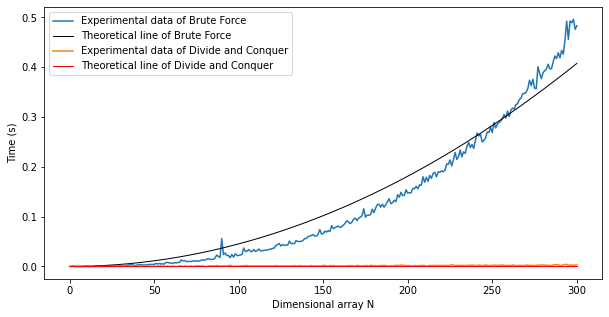

In [17]:
#N = 500
x = np.array([i for i in range(N+1)])


popt, _ = curve_fit(const, x, Divide_and_conquer_Time)
a_const = popt
Divide_and_conquer_Time_fit = [a_const]*(N+1)

popt, _ = curve_fit(xpower2, x, Brute_Force_Time)
a_power = popt
Brute_Force_Time_fit = xpower2(x,a_power)



plt.figure(figsize=(10,5))
plt.plot(x, Brute_Force_Time, label='Experimental data of Brute Force', markersize=1)
plt.plot(x,Brute_Force_Time_fit,'', color = 'black', linewidth=1, label='Theoretical line of Brute Force')
plt.plot(x, Divide_and_conquer_Time, label='Experimental data of Divide and Conquer', markersize=1)
plt.plot(x,Divide_and_conquer_Time_fit,'', color = 'red', linewidth=1, label='Theoretical line of Divide and Conquer')

plt.legend()
plt.xlabel("Dimensional array N")
plt.ylabel("Time (s)")

plt.savefig(fname = "D:/Магистр/Algorithms/graph_8.12.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

In [21]:
def xlogx(x,a,b):
    return a*x*np.log2(x+b)

<ipython-input-23-a56eb03b66c2>:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_8.19.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-23-a56eb03b66c2>:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_8.19.png", dpi=300, facecolor='w', edgecolor='w',


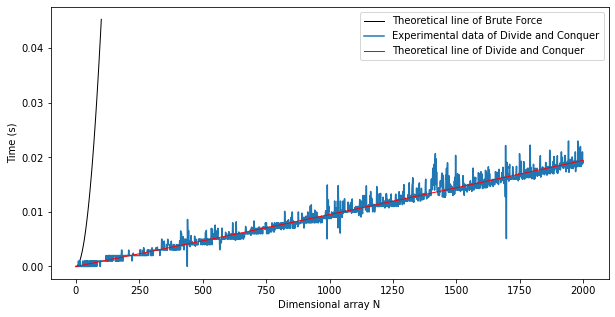

In [23]:
N = 2000
Divide_and_conquer_Time = [0]*(N+1)

for i in range(1,N+1):
    Array = np.array([randint(-100,100) for i in range(i)])

    start_time = time.time()
    a,b,c = Find_Maximum_Subarray(Array,0,len(Array)-1)
    Divide_and_conquer_Time[i] = time.time() - start_time

x = np.array([i for i in range(N+1)])
NN = 100
xx = np.array([i for i in range(NN+1)])
yy = xpower2(xx,a_power)


popt, _ = curve_fit(xlogx, x, Divide_and_conquer_Time)
a_log, b_log = popt
Divide_and_conquer_Time_fit = xlogx(x,a_log,b_log)

plt.figure(figsize=(10,5))
plt.plot(xx,yy,'', color = 'black', linewidth=1, label='Theoretical line of Brute Force')
plt.plot(x, Divide_and_conquer_Time, label='Experimental data of Divide and Conquer', markersize=1)
plt.plot(x,Divide_and_conquer_Time_fit,'', color = 'red', linewidth=1, label='Theoretical line of Divide and Conquer')

plt.legend()
plt.xlabel("Dimensional array N")
plt.ylabel("Time (s)")

plt.savefig(fname = "D:/Магистр/Algorithms/graph_8.19.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

# Rod cutting

## Recursive top-down implementation

In [2]:
def Cut_Rod(p,n):
    if n == 0:
        return 0
    q = -100000000000
    for i in range(1,n+1):
        q = max(q,p[i]+Cut_Rod(p,n-i))
    return q

## Using dynamic programming for optimal rod cutting

In [3]:
def Memorized_Cut_Road_Aux(p,n,r):
    if r[n]>=0:
        return r[n]
    if n==0:
        q = 0
    else:
        q = -1000000000000
        for i in range(1,n+1):
            q = max(q,p[i]+Memorized_Cut_Road_Aux(p,n-i,r))
    r[n] = q
    return q

def Memoized_Cut_Rod(p,n):
    r = [-100000000]*(n+1)
    return Memorized_Cut_Road_Aux(p,n,r)

## Analyse the chosen algorithms

In [4]:
import time
N = 18
Cut_Rod_Time = [0]*(N+1)
Memoized_Cut_Rod_Time = [0]*(N+1)

for i in range(1,N+1):
    Price = np.array([randint(0,100) for i in range(i)])
    #print(Price)

    start_time = time.time()
    res = Cut_Rod(Price,len(Price)-1)
    Cut_Rod_Time[i] = time.time() - start_time
    #print(Array[a1:b1+1],c1)

    start_time = time.time()
    res1 = Memoized_Cut_Rod(Price,len(Price)-1)
    Memoized_Cut_Rod_Time[i] = time.time() - start_time
    #print(Array[a:b+1],c)

In [5]:
def deg(x,a):
    return a*2**x

<ipython-input-10-0093720face5>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_3.23.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-10-0093720face5>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_3.23.png", dpi=300, facecolor='w', edgecolor='w',


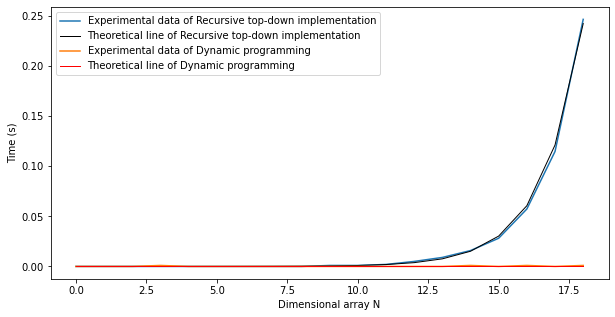

In [10]:
#N = 25
x = np.array([i for i in range(N+1)])


popt, _ = curve_fit(const, x, Memoized_Cut_Rod_Time)
a_const = popt
Memoized_Cut_Rod_Time_fit = [a_const]*(N+1)

popt, _ = curve_fit(deg, x, Cut_Rod_Time)
a_deg = popt
Cut_Rod_Time_fit = deg(x,a_deg)



plt.figure(figsize=(10,5))
plt.plot(x, Cut_Rod_Time, '', label='Experimental data of Recursive top-down implementation', markersize=1)
plt.plot(x,Cut_Rod_Time_fit,'', color = 'black', linewidth=1, label='Theoretical line of Recursive top-down implementation')
plt.plot(x, Memoized_Cut_Rod_Time, '', label='Experimental data of Dynamic programming', markersize=1)
plt.plot(x,Memoized_Cut_Rod_Time_fit,'', color = 'red', linewidth=1, label='Theoretical line of Dynamic programming')

plt.legend()
plt.xlabel("Dimensional array N")
plt.ylabel("Time (s)")

plt.savefig(fname = "D:/Магистр/Algorithms/graph_3.23.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

<ipython-input-11-5447fa04dd18>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_3.25.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-11-5447fa04dd18>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_3.25.png", dpi=300, facecolor='w', edgecolor='w',


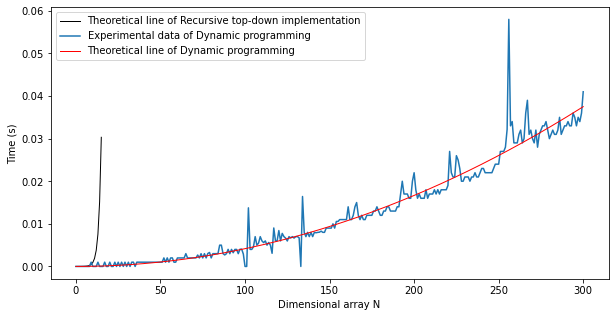

In [11]:
import time
N = 300
Memoized_Cut_Rod_Time = [0]*(N+1)

for i in range(1,N+1):
    Price = np.array([randint(0,100) for i in range(i)])
    start_time = time.time()
    res1 = Memoized_Cut_Rod(Price,len(Price)-1)
    Memoized_Cut_Rod_Time[i] = time.time() - start_time

x = np.array([i for i in range(N+1)])

popt, _ = curve_fit(xpower2, x, Memoized_Cut_Rod_Time)
a_power = popt
Memoized_Cut_Rod_Time_fit = xpower2(x,a_power)


plt.figure(figsize=(10,5))

NN = 16
xx = np.arange(NN)
yy = [(a_deg*2**i)[0] for i in range(NN)] 


plt.plot(xx,yy,'', color = 'black', linewidth=1, label='Theoretical line of Recursive top-down implementation')
plt.plot(x, Memoized_Cut_Rod_Time, '', label='Experimental data of Dynamic programming', markersize=1)
plt.plot(x,Memoized_Cut_Rod_Time_fit,'', color = 'red', linewidth=1, label='Theoretical line of Dynamic programming')

plt.legend()
plt.xlabel("Dimensional array N")
plt.ylabel("Time (s)")

plt.savefig(fname = "D:/Магистр/Algorithms/graph_3.25.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)